## <center>商场销售分析</center>

### <center>【结论/摘要】</center>
1、消费者的**时间偏好在第一季度和每个月的下旬**，可以在此时间段推广宣传、加强促销等。</br></br>
2、相较于非会员，**会员具有更大的消费潜力**（消费金额高），因此将客户发展成为会员十分必要。</br>
&emsp; &nbsp;但是，从目前的数据分析来看，会员在折扣力度和绝对优惠上与会员相差不大，难以吸引客户成为会员。  
&emsp; &nbsp;建议通过（1）降低入会标准；（2）使用“折上折”、个性化推荐等机制使会员客户享受更大的优惠和更好的服务。</br></br>
3、通过探析会员客户，利用**RFM模型将客户细分为3类**，并针对各类型客户特点做出相应的方案。</br>
<li>0类客户（26273人次）R、F、M值适中，属于一般维持用户。建议方案：积分制，赠送优惠券，推荐热门产品。</li>
<li>1类客户（22810人次）距离最近一次交易时间久远，并且交易频率和交易金额最低，属于流失/可唤回用户。建议方案：提供个性化新品信息，赠送优惠券等。</li>
<li>2类用户（40249人次）在近期有交易，且交易频次和金额高，属于重要价值客户。建议方案：倾斜更多资源，VIP服务，个性化服务、附加销售。</li>

【关键词】：描述统计；同质性分析；差异性分析；KMeans；RFM模型  
【涉及工具和技术】：Pandas；matplotlib；apply、lamda函数；数据清洗；词云；K-Means聚类；HTML

### 导航
[一、基本信息](#一基本信息)</br>
[二、数据清洗](#二数据清洗)</br>
[三、数据分析：](#三数据分析) &nbsp; [1.同质性分析](#消费者同质性特点分析) &nbsp; [2.差异性分析](#差异分析会员与非会员)   
[四、RFM模型](#四会员rfm模型)


In [69]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
# 屏蔽SettingWithCopyWarning警告
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from wordcloud import WordCloud
# from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### 一、基本信息


In [2]:
# 读入数据
sale = pd.read_csv('./cumcm2018c2.csv')
sale.head(n=10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23388\3149148914.py:2: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv('./cumcm2018c2.csv')


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜
5,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,230.0,214.30,兰芝化妆品正价瓶,214.30,6,25bb,8077.0,兰芝柜
6,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,310.0,288.85,兰芝化妆品正价瓶,288.85,6,25bb,8077.0,兰芝柜
7,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,9,358.0,3002.15,兰芝化妆品正价瓶,3002.15,6,25bb,8077.0,兰芝柜
8,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,235.0,218.95,兰芝化妆品正价瓶,218.95,6,25bb,8077.0,兰芝柜
9,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,330.0,307.50,兰芝化妆品正价瓶,307.50,6,25bb,8077.0,兰芝柜


数据表后4列为无用数据，可剔除。 --> [TO DO 1: 删除无用列]

In [3]:
# 基本信息
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893532 entries, 0 to 1893531
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   会员卡号       object 
 1   消费产生的时间    object 
 2   商品编码       object 
 3   销售数量       int64  
 4   商品售价       float64
 5   消费金额       float64
 6   商品名称       object 
 7   此次消费的会员积分  float64
 8   收银机号       int64  
 9   单据号        object 
 10  柜组编码       float64
 11  柜组名称       object 
dtypes: float64(4), int64(2), object(6)
memory usage: 173.4+ MB


“消费产生的时间”数据格式应转化成datatime。 --> [TO DO 2：格式转换]

In [4]:
# 基本统计信息
sale.describe()

,销售数量,商品售价,消费金额,此次消费的会员积分,收银机号,柜组编码
count,1.893532e+06,1.893532e+06,1.893532e+06,876046.000000,1.893532e+06,876046.000000
mean,1.060906e+00,1.093785e+03,1.047361e+03,1035.463948,1.002693e+02,6328.248018
std,2.483580e+00,2.582808e+03,2.697462e+03,2064.978604,6.689405e+01,2371.230147
min,-3.810000e+02,1.000000e-01,-6.712575e+05,-201616.000000,1.000000e+00,0.000000
25%,1.000000e+00,3.200000e+02,3.100000e+02,180.000000,8.700000e+01,4334.000000
50%,1.000000e+00,5.700000e+02,5.640000e+02,510.000000,9.400000e+01,8064.000000
75%,1.000000e+00,1.100000e+03,1.098000e+03,1259.000000,1.010000e+02,8123.000000
max,1.492000e+03,1.342515e+06,1.342515e+06,268503.000000,3.200000e+02,9005.000000


“销售数量”、“消费金额”、“此次消费的会员积分	”列最小值为负数，异常。 --> [TO DO 3：数据异常]

In [5]:
# 查看每列是否有空值，True为存在空值，False为全非空
sale.isnull().any()

会员卡号          True
消费产生的时间      False
商品编码         False
销售数量         False
商品售价         False
消费金额         False
商品名称         False
此次消费的会员积分     True
收银机号         False
单据号          False
柜组编码          True
柜组名称          True
dtype: bool

“会员卡号”和“此次消费的会员积分”列有空值。 --> [TO DO 4：空值处理]

In [6]:
# 查看“会员卡号”中空值行
sale[sale['会员卡号'].isnull()]


,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
243955,NaN,2016-01-01 10:46:09.750,e2c7df40,2,210.0,420.0,雅诗兰黛柔润护唇膏SPF15,NaN,55,25bb,NaN,NaN
243956,NaN,2016-01-01 10:46:09.750,e2c7df40,2,210.0,420.0,雅诗兰黛柔润护唇膏,NaN,55,25bb,NaN,NaN
243957,NaN,2016-01-01 10:46:09.750,e2c7df40,2,210.0,420.0,雅诗兰黛柔润防晒护唇膏SPF15,NaN,55,25bb,NaN,NaN
243958,NaN,2016-01-01 10:48:49.406,6e479326,1,480.0,480.0,兰蔻四色眼影/眼影盘,NaN,43,25bb,NaN,NaN
243959,NaN,2016-01-01 10:48:49.406,6e479326,1,480.0,480.0,兰蔻四色眼影/眼影盘4*0.5g,NaN,43,25bb,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1781795,NaN,2017-09-23 20:05:13.783,7866a959,1,520.0,468.0,雅诗兰黛紧实抗皱竹粹水.,NaN,89,b94d,NaN,NaN
1781796,NaN,2017-09-23 20:05:13.783,7866a959,1,520.0,468.0,雅诗兰黛晶透沁白精粹水.,NaN,89,b94d,NaN,NaN
1781797,NaN,2017-09-23 20:05:13.783,7866a959,1,520.0,468.0,雅诗兰黛竹粹水/淡斑精粹水,NaN,89,b94d,NaN,NaN
1781798,NaN,2017-09-23 20:05:13.783,1eb9ab8b,1,880.0,792.0,雅诗兰黛弹性紧实晚霜,NaN,89,b94d,NaN,NaN


**【TO DO LIST】**  
1、删除无用列：  删除数据表后4列。  
2、数据格式转换：  将“消费产生的时间”列格式转化成datatime。  
3、处理数据异常：  “销售数量”、“消费金额”、“此次消费的会员积分”列最小值为负数，异常。   
4、处理空值：  处理“会员卡号”和“此次消费的会员积分”列的空值。   
5、会员与非会员分析：  “会员卡号”为空值认定为非会员，可以做会员和非会员之间的指标对比，以发掘价值信息。

[返回导航](#导航)

### 二、数据清洗

In [7]:
# 【DO 1】剔除后4列和“商品编码”列
sale_info = sale.iloc[:,:-4]
sale_info.drop(columns='商品编码',inplace=True)
sale_info

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分
0,1be1e3fe,2015-01-01 00:05:41.593,1,290.0,270.20,兰芝化妆品正价瓶,270.20
1,1be1e3fe,2015-01-01 00:05:41.593,1,325.0,302.80,兰芝化妆品正价瓶,302.80
2,1be1e3fe,2015-01-01 00:05:41.593,1,195.0,181.80,兰芝化妆品正价瓶,181.80
3,1be1e3fe,2015-01-01 00:05:41.593,1,270.0,251.55,兰芝化妆品正价瓶,251.55
4,1be1e3fe,2015-01-01 00:05:41.593,2,245.0,456.55,兰芝化妆品正价瓶,456.55
...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,1,200.0,200.00,植村秀眉笔4g,200.00
1893528,220c0564,2018-01-03 21:41:53.140,1,1.0,1.00,爱慕内衣正价件,1.00
1893529,220c0564,2018-01-03 21:41:53.140,1,490.0,490.00,爱慕内衣正价件,490.00
1893530,220c0564,2018-01-03 21:41:53.140,1,280.0,280.00,爱慕内衣正价件,280.00


In [8]:
# 【DO 3】处理异常数据：1、查看异常数据数量；2、将“销售数量”和“消费金额”中的异常数据改为正值；3、剔除 销售数量*商品售价<消费金额 的异常值
sale_info[sale_info['销售数量'] < 0]

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分
282,8b8df46b,2015-01-01 13:30:36.610,-1,58.0,-58.0,韵魅正价系列双,-58.0
323,2c2df0bb,2015-01-01 13:56:26.250,-1,3192.0,-3192.0,米亚B件,-3192.0
537,c42cea77,2015-01-01 15:15:51.313,-1,1370.0,-1370.0,ASH C双,-1370.0
671,c7e0e423,2015-01-01 15:59:27.313,-1,11520.0,-11520.0,奥得臣（AVFASON）服饰系列A受卡件,-11520.0
674,c7e0e423,2015-01-01 15:59:27.313,-1,4482.0,-4482.0,奥得臣（AVFASON）服饰系列A受卡件,-4482.0
...,...,...,...,...,...,...,...
1893436,abe125fc,2018-01-03 19:28:22.126,-1,1984.0,-1984.0,朗姿B件,-1984.0
1893437,abe125fc,2018-01-03 19:28:22.126,-1,1782.0,-1782.0,朗姿A件,-1782.0
1893461,0051e01e,2018-01-03 19:54:16.860,-1,1.0,-1.0,欧莱雅化妆品系列支,-1.0
1893463,0051e01e,2018-01-03 19:55:42.860,-1,1.0,-1.0,欧莱雅化妆品系列支,-1.0


In [9]:
sale_info[sale_info['消费金额'] < 0]

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分
282,8b8df46b,2015-01-01 13:30:36.610,-1,58.0,-58.00,韵魅正价系列双,-58.0
323,2c2df0bb,2015-01-01 13:56:26.250,-1,3192.0,-3192.00,米亚B件,-3192.0
433,254865de,2015-01-01 14:44:08.610,1,253.0,-0.01,韵魅B.5系列双,0.0
537,c42cea77,2015-01-01 15:15:51.313,-1,1370.0,-1370.00,ASH C双,-1370.0
671,c7e0e423,2015-01-01 15:59:27.313,-1,11520.0,-11520.00,奥得臣（AVFASON）服饰系列A受卡件,-11520.0
...,...,...,...,...,...,...,...
1893436,abe125fc,2018-01-03 19:28:22.126,-1,1984.0,-1984.00,朗姿B件,-1984.0
1893437,abe125fc,2018-01-03 19:28:22.126,-1,1782.0,-1782.00,朗姿A件,-1782.0
1893461,0051e01e,2018-01-03 19:54:16.860,-1,1.0,-1.00,欧莱雅化妆品系列支,-1.0
1893463,0051e01e,2018-01-03 19:55:42.860,-1,1.0,-1.00,欧莱雅化妆品系列支,-1.0


In [10]:
# 将“销售数量”和“消费金额”改为正值
sale_info['销售数量'] = sale_info['销售数量'].apply(lambda num : -num if num < 0 else num)
sale_info['消费金额'] = sale_info['消费金额'].apply(lambda amount : -amount if amount < 0 else amount)

In [11]:
# 剔除 销售数量*商品售价<消费金额 的异常值
sale_cleand = sale_info[sale_info['销售数量'] * sale_info['商品售价'] >= sale_info['消费金额']]

In [12]:
sale_cleand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893472 entries, 0 to 1893531
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   会员卡号       object 
 1   消费产生的时间    object 
 2   销售数量       int64  
 3   商品售价       float64
 4   消费金额       float64
 5   商品名称       object 
 6   此次消费的会员积分  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 115.6+ MB


[返回导航](#导航)

### 三、数据分析

#### 消费者同质性特点分析

In [13]:
# 总数据概览
total = sale_cleand
total

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分
0,1be1e3fe,2015-01-01 00:05:41.593,1,290.0,270.20,兰芝化妆品正价瓶,270.20
1,1be1e3fe,2015-01-01 00:05:41.593,1,325.0,302.80,兰芝化妆品正价瓶,302.80
2,1be1e3fe,2015-01-01 00:05:41.593,1,195.0,181.80,兰芝化妆品正价瓶,181.80
3,1be1e3fe,2015-01-01 00:05:41.593,1,270.0,251.55,兰芝化妆品正价瓶,251.55
4,1be1e3fe,2015-01-01 00:05:41.593,2,245.0,456.55,兰芝化妆品正价瓶,456.55
...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,1,200.0,200.00,植村秀眉笔4g,200.00
1893528,220c0564,2018-01-03 21:41:53.140,1,1.0,1.00,爱慕内衣正价件,1.00
1893529,220c0564,2018-01-03 21:41:53.140,1,490.0,490.00,爱慕内衣正价件,490.00
1893530,220c0564,2018-01-03 21:41:53.140,1,280.0,280.00,爱慕内衣正价件,280.00


In [14]:
# 数据处理
# [DO 2 数据格式转化]
total['消费产生的时间'] = pd.to_datetime(total['消费产生的时间'])
total['年份'] = total['消费产生的时间'].dt.year
total['季度'] = total['消费产生的时间'].dt.quarter
total['月份'] = total['消费产生的时间'].dt.month
total['天'] = total['消费产生的时间'].dt.day
total['旬'] = total['天'].apply(lambda x : 1 if x <= 10 else 2 if x <= 20 else 3) # 1为上旬，2为中旬，3为下旬
total.head(10)

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,年份,季度,月份,天,旬
0,1be1e3fe,2015-01-01 00:05:41.593,1,290.0,270.20,兰芝化妆品正价瓶,270.20,2015,1,1,1,1
1,1be1e3fe,2015-01-01 00:05:41.593,1,325.0,302.80,兰芝化妆品正价瓶,302.80,2015,1,1,1,1
2,1be1e3fe,2015-01-01 00:05:41.593,1,195.0,181.80,兰芝化妆品正价瓶,181.80,2015,1,1,1,1
3,1be1e3fe,2015-01-01 00:05:41.593,1,270.0,251.55,兰芝化妆品正价瓶,251.55,2015,1,1,1,1
4,1be1e3fe,2015-01-01 00:05:41.593,2,245.0,456.55,兰芝化妆品正价瓶,456.55,2015,1,1,1,1
5,1be1e3fe,2015-01-01 00:05:41.593,1,230.0,214.30,兰芝化妆品正价瓶,214.30,2015,1,1,1,1
6,1be1e3fe,2015-01-01 00:05:41.593,1,310.0,288.85,兰芝化妆品正价瓶,288.85,2015,1,1,1,1
7,1be1e3fe,2015-01-01 00:05:41.593,9,358.0,3002.15,兰芝化妆品正价瓶,3002.15,2015,1,1,1,1
8,1be1e3fe,2015-01-01 00:05:41.593,1,235.0,218.95,兰芝化妆品正价瓶,218.95,2015,1,1,1,1
9,1be1e3fe,2015-01-01 00:05:41.593,1,330.0,307.50,兰芝化妆品正价瓶,307.50,2015,1,1,1,1


In [15]:
# 最后一次的统计时间（数据截止时间）
total['消费产生的时间'].max()

Timestamp('2018-01-03 21:41:53.140000')

In [16]:
# 由于2018年只有1月份的数据，年度数据不完整，故剔除
total = total[total['年份'] < 2018]

In [17]:
# 每年季度订单数量
quarter = total.groupby(['年份','季度'])['商品名称'].count().reset_index()
quarter

,年份,季度,商品名称
0,2015,1,102431
1,2015,2,91062
2,2015,3,50316
3,2015,4,133
4,2016,1,229425
5,2016,2,198709
6,2016,3,215387
7,2016,4,207053
8,2017,1,262663
9,2017,2,216353


In [18]:
# 定义绘制折线图的函数
years = ['2015','2016','2017']
def draw_plot(data,step):
    x = data.iloc[0:step,1]
    for i in range(len(years)):
        y = data.iloc[i*step:(i+1)*step,2]
        colors = ['r', 'g', 'b']
        plt.plot(x, y, linestyle = '-.', c = colors[i], alpha = 0.8, marker = 'o', label = years[i])
    plt.legend(loc='upper right')

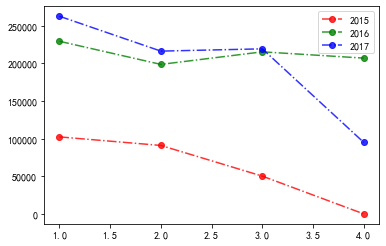

In [19]:
# 每年季度订单数量折线图
draw_plot(quarter,step=4)

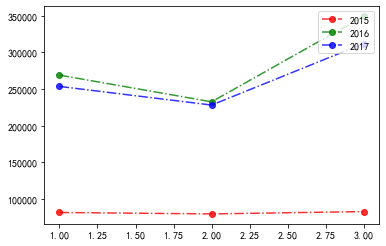

In [20]:
# 每旬订单数量折线图
meadow = total.groupby(['年份','旬'])['商品名称'].count().reset_index()
draw_plot(meadow,step=3)

**结论：** 从季度数据来看，消费者是时间偏好在第一季度，可能的原因是春节带来的效应；从月份数据来看，消费者偏好在每月下旬，即月末进行消费，可能的原因是消费者月末发薪水。当然，是消费者本身具有这些偏好，还是商场活动的驱动，需要结合商场的实际业务来进行因果关系的判断。如果是商场在这些时间段有大力度的折扣等活动，那么基本可以判断是商场行为导致的消费者偏好；否则，可以认为是消费者行为导致的消费者偏好，若此，可以根据消费者偏好进行合适的商场促销等活动。

#### 差异分析（会员与非会员）

In [21]:
# 创建会员表
vip = sale_cleand[sale_cleand['会员卡号'].isna() == False]
vip

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,年份,季度,月份,天,旬
0,1be1e3fe,2015-01-01 00:05:41.593,1,290.0,270.20,兰芝化妆品正价瓶,270.20,2015,1,1,1,1
1,1be1e3fe,2015-01-01 00:05:41.593,1,325.0,302.80,兰芝化妆品正价瓶,302.80,2015,1,1,1,1
2,1be1e3fe,2015-01-01 00:05:41.593,1,195.0,181.80,兰芝化妆品正价瓶,181.80,2015,1,1,1,1
3,1be1e3fe,2015-01-01 00:05:41.593,1,270.0,251.55,兰芝化妆品正价瓶,251.55,2015,1,1,1,1
4,1be1e3fe,2015-01-01 00:05:41.593,2,245.0,456.55,兰芝化妆品正价瓶,456.55,2015,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,1,200.0,200.00,植村秀眉笔4g,200.00,2018,1,1,3,1
1893528,220c0564,2018-01-03 21:41:53.140,1,1.0,1.00,爱慕内衣正价件,1.00,2018,1,1,3,1
1893529,220c0564,2018-01-03 21:41:53.140,1,490.0,490.00,爱慕内衣正价件,490.00,2018,1,1,3,1
1893530,220c0564,2018-01-03 21:41:53.140,1,280.0,280.00,爱慕内衣正价件,280.00,2018,1,1,3,1


In [22]:
# 创建非会员表
not_vip = sale_cleand[sale_cleand['会员卡号'].isna()]
not_vip

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,年份,季度,月份,天,旬
243955,NaN,2016-01-01 10:46:09.750,2,210.0,420.0,雅诗兰黛柔润护唇膏SPF15,NaN,2016,1,1,1,1
243956,NaN,2016-01-01 10:46:09.750,2,210.0,420.0,雅诗兰黛柔润护唇膏,NaN,2016,1,1,1,1
243957,NaN,2016-01-01 10:46:09.750,2,210.0,420.0,雅诗兰黛柔润防晒护唇膏SPF15,NaN,2016,1,1,1,1
243958,NaN,2016-01-01 10:48:49.406,1,480.0,480.0,兰蔻四色眼影/眼影盘,NaN,2016,1,1,1,1
243959,NaN,2016-01-01 10:48:49.406,1,480.0,480.0,兰蔻四色眼影/眼影盘4*0.5g,NaN,2016,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1781795,NaN,2017-09-23 20:05:13.783,1,520.0,468.0,雅诗兰黛紧实抗皱竹粹水.,NaN,2017,3,9,23,3
1781796,NaN,2017-09-23 20:05:13.783,1,520.0,468.0,雅诗兰黛晶透沁白精粹水.,NaN,2017,3,9,23,3
1781797,NaN,2017-09-23 20:05:13.783,1,520.0,468.0,雅诗兰黛竹粹水/淡斑精粹水,NaN,2017,3,9,23,3
1781798,NaN,2017-09-23 20:05:13.783,1,880.0,792.0,雅诗兰黛弹性紧实晚霜,NaN,2017,3,9,23,3


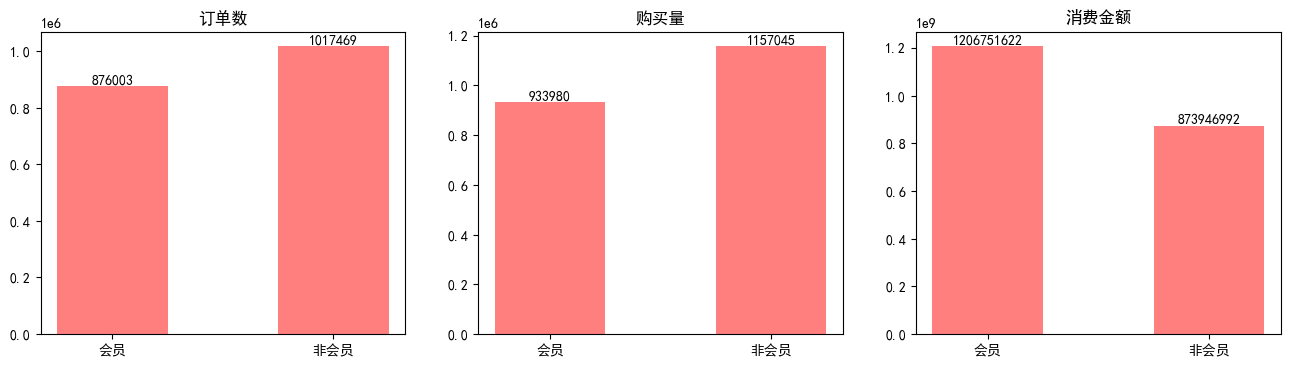

In [23]:
# 会员与非会员各项数量指标对比
# 设置参数
titles = ['订单数','购买量','消费金额']  # 图表标题
x_label = ['会员','非会员']  # 横轴标签

order_num = [vip.shape[0],not_vip.shape[0]]
sale_num = [vip['销售数量'].sum(),not_vip['销售数量'].sum()]
sale_fare = [vip['消费金额'].sum(),not_vip['消费金额'].sum()]
y = [order_num,sale_num,sale_fare]  # y轴数据

# 绘图
fig = plt.figure(figsize=(16,4),dpi=100)
for i in range(len(titles)):
    ax = fig.add_subplot(1,3,i+1)
    pic = plt.bar(x_label,y[i],color='red',alpha = 0.5, width = 0.5)
    plt.title(titles[i]) 
    plt.bar_label(pic,fmt="%d") # 设置数据标签


In [24]:
print("会员消费金额与非会员之间的差额：{:.2f}亿元".format((vip['消费金额'].sum()-not_vip['消费金额'].sum())/100000000))

会员消费金额与非会员之间的差额：3.33亿元


**结论：** 会员的消费笔数和购买量都不及非会员，但是其总的消费金额却比非会员高出3.33亿元。因此，会员具备更高的消费潜力，发展会员并增加客户粘性十分必要。

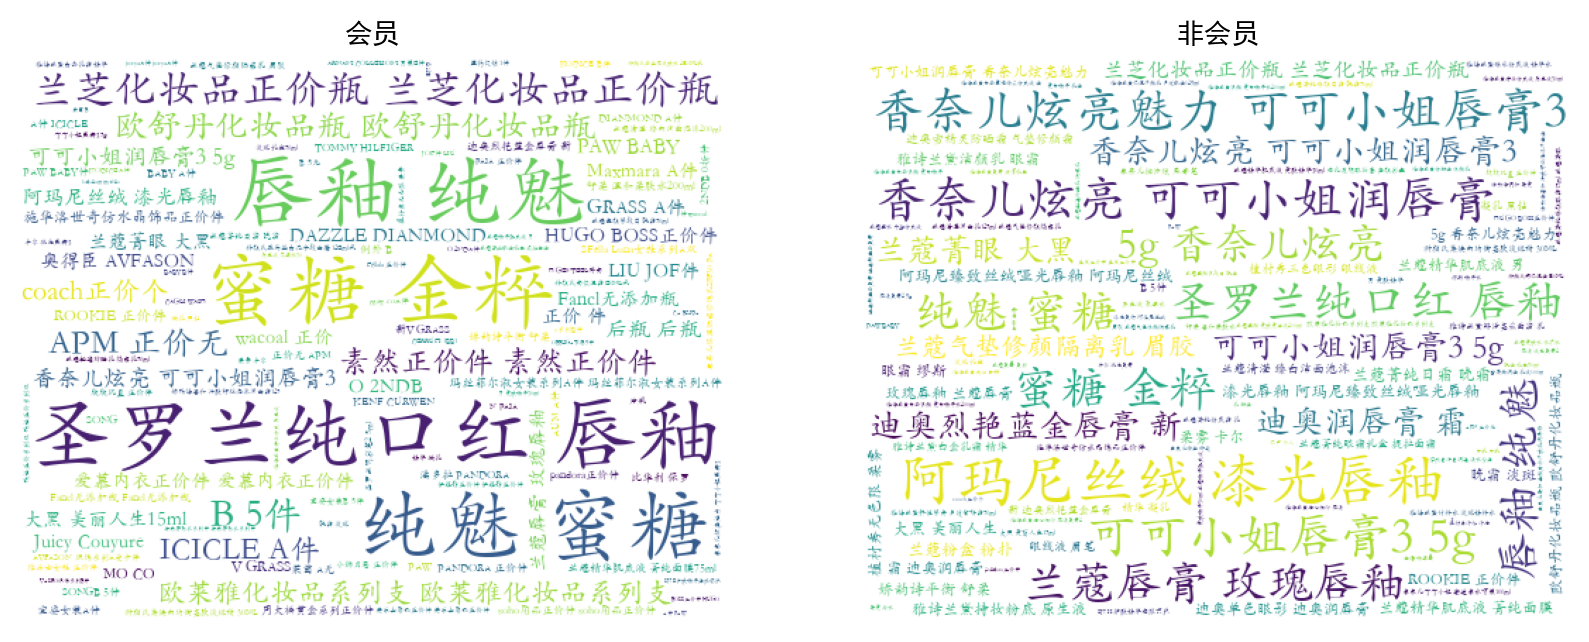

In [25]:
# 商品比较
wc_titles = ['会员','非会员']
vip_text = vip['商品名称'].values.tolist()
not_vip_text = not_vip['商品名称'].values.tolist()
text = [vip_text,not_vip_text]

fig = plt.figure(figsize=(10,4),dpi=200)
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    wc = WordCloud(font_path = "./STKAITI.TTF", background_color = 'white', width = 500, height = 400).generate_from_text(' '.join(text[i]))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(wc_titles[i],fontdict = {'fontsize' : 10}) 


In [26]:
def data_describe(label,data):
    '''
    label:设置消费者标签，1为会员，0为非会员；
    data:传入series
    '''
    name = '会员' if label == 1 else '非会员'
    print(name)
    print(round(data.describe(),2))

In [27]:
# 折扣力度对比
vip['折扣'] = vip['消费金额']/(vip['销售数量']*vip['商品售价'])
not_vip['折扣'] = not_vip['消费金额']/(not_vip['销售数量']*not_vip['商品售价'])
data_describe(1,vip['折扣'])
data_describe(0,not_vip['折扣'])

会员
count    876003.00
mean          0.95
std           0.14
min           0.00
25%           0.92
50%           1.00
75%           1.00
max           1.00
Name: 折扣, dtype: float64
非会员
count    1017469.00
mean           0.96
std            0.12
min            0.00
25%            1.00
50%            1.00
75%            1.00
max            1.00
Name: 折扣, dtype: float64


In [28]:
# 差价对比
vip['差价'] = vip['销售数量'] * vip['商品售价'] - vip['消费金额']
not_vip['差价'] = not_vip['销售数量'] * not_vip['商品售价'] - not_vip['消费金额']
data_describe(1,vip['差价'])
data_describe(0,not_vip['差价'])

会员
count    876003.00
mean         56.57
std         239.00
min           0.00
25%           0.00
50%           0.00
75%          25.02
max       50000.00
Name: 差价, dtype: float64
非会员
count    1017469.00
mean          31.92
std          208.44
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        20000.00
Name: 差价, dtype: float64


(array([11750., 15187., 20426., 13280., 19834., 13425.,  8887., 11593.,
        13339.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 9 artists>)

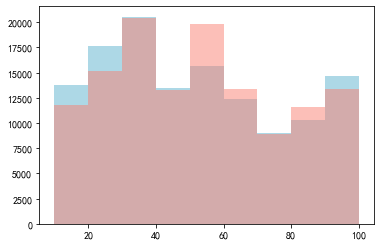

In [29]:
# 差价的分布差异
fig, ax = plt.subplots()
ax.hist(vip['差价'], bins=9, range=(10,100), color='lightblue', alpha=1.0)
ax.hist(not_vip['差价'], bins=9, range=(10,100), color='salmon', alpha=0.5)

通过差价的直方图来看，会员们主要聚集在小优惠（10~30元的优惠）和较大优惠（90~100元），而非会员则偏好50~90元的优惠。  
非会员主要通过店铺活动的优惠力度判断是否消费，当店铺折扣在50~90元时，会员没有吸引力。  
营销改进/会员转化：在活动折扣的基础上，增加会员折扣的机制，即让会员可以“折上折”。

**结论**   
会员的消费笔数和购买量都不及非会员，但是其总的消费金额却比非会员。因此，发展会员并增加客户粘性十分必要。  
会员的平均折扣力度与非会员相差不大，在这方面，会员没有很大优势。  
商品活动期间，会员的绝对优惠不及非会员，此时入会没有吸引力。  
如何发展会员？1、降低入会标准；2、“折上折”等机制，让会员在各方面比非会员有优势。

[返回导航](#导航)

### 四、会员RFM模型

In [30]:
vip

,会员卡号,消费产生的时间,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,年份,季度,月份,天,旬,折扣,差价
0,1be1e3fe,2015-01-01 00:05:41.593,1,290.0,270.20,兰芝化妆品正价瓶,270.20,2015,1,1,1,1,0.931724,19.80
1,1be1e3fe,2015-01-01 00:05:41.593,1,325.0,302.80,兰芝化妆品正价瓶,302.80,2015,1,1,1,1,0.931692,22.20
2,1be1e3fe,2015-01-01 00:05:41.593,1,195.0,181.80,兰芝化妆品正价瓶,181.80,2015,1,1,1,1,0.932308,13.20
3,1be1e3fe,2015-01-01 00:05:41.593,1,270.0,251.55,兰芝化妆品正价瓶,251.55,2015,1,1,1,1,0.931667,18.45
4,1be1e3fe,2015-01-01 00:05:41.593,2,245.0,456.55,兰芝化妆品正价瓶,456.55,2015,1,1,1,1,0.931735,33.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,1,200.0,200.00,植村秀眉笔4g,200.00,2018,1,1,3,1,1.000000,0.00
1893528,220c0564,2018-01-03 21:41:53.140,1,1.0,1.00,爱慕内衣正价件,1.00,2018,1,1,3,1,1.000000,0.00
1893529,220c0564,2018-01-03 21:41:53.140,1,490.0,490.00,爱慕内衣正价件,490.00,2018,1,1,3,1,1.000000,0.00
1893530,220c0564,2018-01-03 21:41:53.140,1,280.0,280.00,爱慕内衣正价件,280.00,2018,1,1,3,1,1.000000,0.00


In [31]:
# 计算R(Recency-近度）
df_R = vip.groupby('会员卡号')['消费产生的时间'].agg(lambda x: x.max()).reset_index()
end_time = vip['消费产生的时间'].max()
df_R['总截止时间'] = end_time
df_R['R'] = (df_R['总截止时间'] - df_R['消费产生的时间']).apply(lambda x : int(str(x).split(' ')[0])/30.0)

# 计算F(Frequency-频度）
df_F = vip.groupby('会员卡号')['商品名称'].count().reset_index()

# 计算M（Monetary-额度）
df_M = vip.groupby('会员卡号')['消费金额'].sum().reset_index()

In [32]:
# 特征合并
RF = pd.merge(df_R,df_F,on='会员卡号')
RFM = pd.merge(RF,df_M,on='会员卡号')
RFM.drop(columns=['消费产生的时间','总截止时间'],inplace=True)
RFM.rename(columns={'商品名称':'F','消费金额':'M'},inplace=True)
RFM

,会员卡号,R,F,M
0,000186fa,3.366667,18,11880.7
1,000234ad,2.100000,12,12850.0
2,0002adb8,18.400000,3,7136.0
3,000339f1,0.600000,20,6340.8
4,0003a4e7,35.200000,2,1219.0
...,...,...,...,...
89327,fffbcb4f,33.033333,5,1610.0
89328,fffbd0ce,13.133333,3,6487.0
89329,fffbfb51,32.400000,3,646.0
89330,fffc9664,32.366667,1,306.0


In [70]:
# 取R、F、M列并进行描述性统计
data = RFM.iloc[:,1:]
data.describe()

,R,F,M
count,89332.000000,89332.000000,8.933200e+04
mean,14.157077,9.806150,1.350862e+04
std,11.867426,23.859945,4.228523e+04
min,0.000000,1.000000,0.000000e+00
25%,3.566667,2.000000,1.360000e+03
50%,10.833333,4.000000,3.856870e+03
75%,24.166667,9.000000,1.145925e+04
max,36.600000,3062.000000,5.113751e+06


In [73]:
# 数据标准化
# MinMaxScaler()能够将数据映射到[0,1]，统一成无量纲数据，反映出数值所在的等级。
mm_data = MinMaxScaler().fit_transform(data)

In [114]:
# 寻找最优聚类数（k值）
kmeans_per_k = [KMeans(n_clusters=k, random_state=22).fit(mm_data) for k in range(2, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

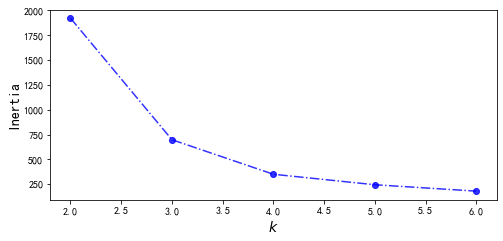

In [125]:
# 肘部法确定最优k值为3
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 7), inertias, linestyle = '-.', c = 'b', alpha = 0.8, marker = 'o')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [126]:
# 三聚类，获取各用户的类别标签
clf = KMeans(n_clusters = 3, random_state = 22).fit(mm_data)
data['labels'] = clf.labels_
data['labels'].value_counts()

2    40249
0    26273
1    22810
Name: labels, dtype: int64

In [127]:
# 用均值来计算两类样本之间的LRFMP
R_avg = data.groupby('labels').agg({'R': np.mean}).reset_index()
F_avg = data.groupby('labels').agg({'F': np.mean}).reset_index()
M_avg = data.groupby('labels').agg({'M': np.mean}).reset_index()

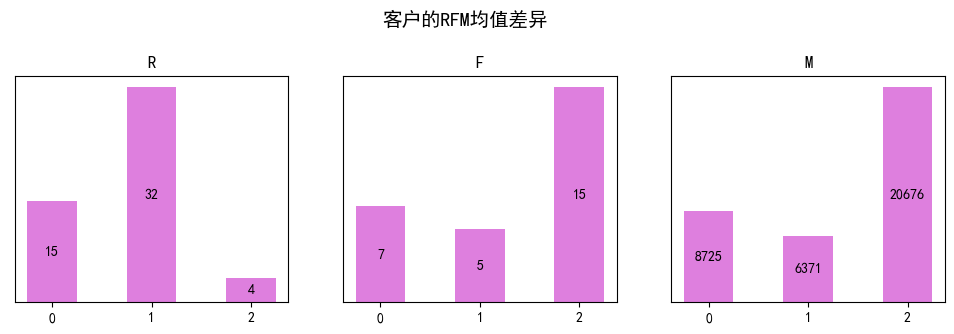

In [148]:
# 绘制各类用户的RFM柱状图
def plot_bar(df,nrow,ncol,n_class):
    fig = plt.figure(figsize=(4*ncol,3),dpi=100)
    for i in range(len(df)):
        ax = fig.add_subplot(nrow,ncol,i+1)
        pic = plt.bar(df[i].iloc[:,0],df[i].iloc[:,1],color='m',alpha = 0.5, width = 0.5)
        plt.bar_label(pic,fmt="%.0f",label_type='center') # 设置数据标签，标签位于柱子中部
        ax.set_xticks(range(n_class))
        ax.set_yticks(()) # 将y轴的值置为空
        ax.set_title(df_list[i].columns[1])
    plt.suptitle('客户的RFM均值差异', y = 1.1, fontsize = 14)

df_list = [R_avg, F_avg, M_avg]
plot_bar(df_list, 1, 3, 3)

0类客户（26273人次）R、F、M值适中，属于一般维持用户。建议方案：积分制，赠送优惠券，推荐热门产品。
1类客户（22810人次）距离最近一次交易时间久远，并且交易频率和交易金额最低，属于可唤回用户。建议方案：提供个性化新品信息，赠送优惠券等。
2类用户（40249人次）在近期有交易，且交易频次和金额高，属于重要价值客户。建议方案：倾斜更多资源，VIP服务，个性化服务、附加销售。
RFM细分方案：https://zhuanlan.zhihu.com/p/81308020

[返回导航](#导航)